In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os,gzip,pickle
from keys import Cols
# 设置字体
matplotlib.rcParams['font.family'] = 'Microsoft YaHei, Times New Roman'
# 全局设置字号
plt.rcParams.update({
    'font.size': 20,  # 基础字号
    'axes.titlesize': 20,  # 标题字号
    'axes.labelsize': 20,  # 坐标轴标签字号
    'xtick.labelsize': 20,  # x轴刻度标签字号
    'ytick.labelsize': 20,  # y轴刻度标签字号
    'legend.fontsize': 18  # 图例字号
})
# 解决负号显示问题
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
with gzip.open(
    r'D:\Devs\Single_Stack_MLJ\data\processed\Static_Model_Verification_without_model-1# gzip',
    'rb'
) as f:
    df_without_model = pickle.load(f)

In [ ]:
max_lye_flow = df_without_model[Cols.lye_flow].max()
min_lye_flow = df_without_model[Cols.lye_flow].min()
df_without_model[Cols.lye_flow] = (df_without_model[Cols.lye_flow] - min_lye_flow) / ((max_lye_flow - min_lye_flow) / 0.02) + 0.32

In [ ]:
# 创建图表和子图
fig, ax1 = plt.subplots(figsize=(18, 5))
plt.title('原始数据', fontsize = 15)

# 绘制第一个因变量的曲线
ax1.plot(df_without_model[Cols.date_time],df_without_model[Cols.current], label = '电流')
ax1.set_xlabel('日期')
ax1.set_ylabel('电流', color='b')
ax1.tick_params('y', colors='b')

# 创建第二个y轴
ax2 = ax1.twinx()

# 绘制第二个因变量的曲线
ax2.plot(df_without_model[Cols.date_time],df_without_model[Cols.temp_out], c = 'green', alpha = 0.4, label = '碱液温度')
ax2.set_ylabel('温度', color='r')
ax2.tick_params('y', colors='r')

# 创建第三个y轴
ax3 = ax1.twinx()

# 绘制第三个因变量的曲线
ax3.plot(df_without_model[Cols.date_time],df_without_model[Cols.lye_flow], c = 'orange', alpha = 0.4, label = '碱液流量')
ax3.set_ylabel('碱液流量', color='orange')
ax3.spines['right'].set_position(('outward', 60))
ax3.tick_params('y', colors='orange')

# 添加图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

# 显示图表
plt.show()

In [13]:
with gzip.open(
    r'D:\Devs\Single_Stack_MLJ\data\processed\Static_Model_Verification_with_model-1# gzip',
    'rb'
) as f:
    df_with_model = pickle.load(f)

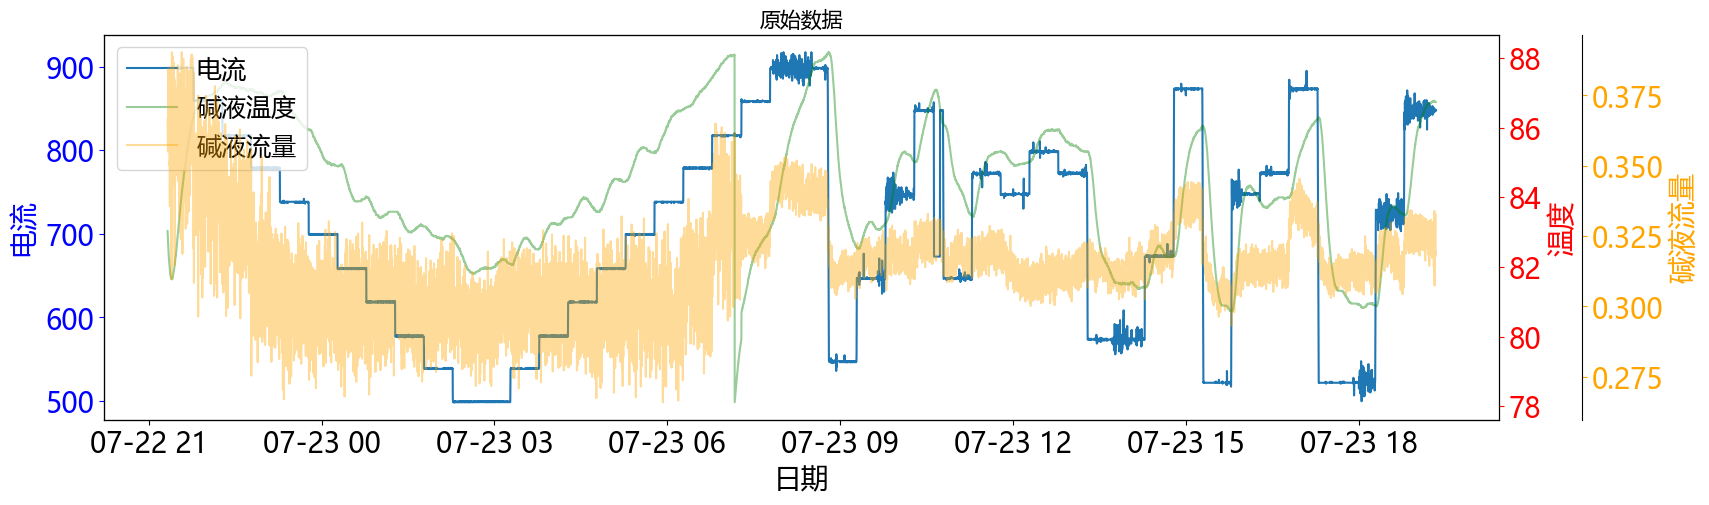

In [14]:
# 创建图表和子图
fig, ax1 = plt.subplots(figsize=(18, 5))
plt.title('原始数据', fontsize = 15)

# 绘制第一个因变量的曲线
ax1.plot(df_with_model[Cols.date_time],df_with_model[Cols.current], label = '电流')
ax1.set_xlabel('日期')
ax1.set_ylabel('电流', color='b')
ax1.tick_params('y', colors='b')

# 创建第二个y轴
ax2 = ax1.twinx()

# 绘制第二个因变量的曲线
ax2.plot(df_with_model[Cols.date_time],df_with_model[Cols.temp_out], c = 'green', alpha = 0.4, label = '碱液温度')
ax2.set_ylabel('温度', color='r')
ax2.tick_params('y', colors='r')

# 创建第三个y轴
ax3 = ax1.twinx()

# 绘制第三个因变量的曲线
ax3.plot(df_with_model[Cols.date_time],df_with_model[Cols.lye_flow], c = 'orange', alpha = 0.4, label = '碱液流量')
ax3.set_ylabel('碱液流量', color='orange')
ax3.spines['right'].set_position(('outward', 60))
ax3.tick_params('y', colors='orange')

# 添加图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

# 显示图表
plt.show()

In [11]:
from datetime import timedelta

def increment_excel_time(df_raw, time_column_index=1):
    """
    处理Excel文件，使时间列从第一行开始，后续每行递增10秒
    
    参数:
    input_file: 输入Excel文件路径
    output_file: 输出Excel文件路径
    time_column_index: 时间列的索引，默认为0（第一列）
    """
    try:
        # 读取Excel文件
        df = pd.read_excel(df_raw)
        
        # 获取列名（根据索引）
        time_column_name = df.columns[time_column_index]
        
        # 将时间列转换为datetime格式
        df[time_column_name] = pd.to_datetime(df[time_column_name], errors='coerce')
        
        # 检查第一行是否有有效时间
        if pd.isna(df.iloc[0, time_column_index]):
            raise ValueError("第一行的时间值无效或为空")
        
        # 获取起始时间
        start_time = df.iloc[0, time_column_index]
        
        # 为后续行设置递增8秒的时间
        for i in range(1, len(df)):
            df.iloc[i, time_column_index] = start_time + timedelta(seconds=8 * i)
        
        return df
        
    except Exception as e:
        print(f"处理过程中出错: {str(e)}")
        return None

# 使用示例
if __name__ == "__main__":
    
    # 处理Excel文件
    result_df = increment_excel_time(df_raw=r'D:\Devs\Single_Stack_MLJ\data\processed\Static_Model_Verification_with_model.xlsx')

In [12]:
target_folder = r'D:\Devs\Single_Stack_MLJ\data\processed'
with gzip.open(
    os.path.join(
        target_folder,
        'Static_Model_Verification_with_model-1# gzip'
    ),'wb'
) as f:
    pickle.dump(result_df,f)